In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
from time import time

In [2]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [ ]:
Base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [ ]:
standard_scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(standard_scaler.fit_transform(X1.values),index = X1.index,columns=X1.columns)
X2 = pd.DataFrame(standard_scaler.fit_transform(X2.values),index = X2.index,columns=X2.columns)
X3 = pd.DataFrame(standard_scaler.fit_transform(X3.values),index = X3.index,columns=X3.columns)

In [ ]:
#Calculate ความแตกต่างของค่า ราคา 'Adj Close','MSFT')ย้อนหลัง
backHistory = [30, 45, 60, 90, 180, 240] 
return_period = 2
BH1, BH2, BH3 = backHistory[1], backHistory[3], backHistory[4]
Y = Base. shift(-return_period)
X4_BH1 = Base.diff( BH1).shift( - BH1)
X4_BH2 = Base.diff( BH2).shift( - BH2)
X4_BH3 = Base.diff( BH3).shift( - BH3)

X4 = pd.concat([X4_BH1, X4_BH2, X4_BH3], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(standard_scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

### Data Preparation


In [ ]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [ ]:
dataset.dropna(inplace=True)
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-10,72.465790,-1.092049,-0.336166,0.004572,0.199625,-1.228587,-1.421087,-1.220836,0.115479,0.092646,-0.257390
2017-10-11,72.813461,-1.063668,-0.397320,0.028951,0.191501,-1.221866,-1.410762,-1.247359,0.073350,0.040695,-0.261315
2017-10-12,72.963829,-1.063668,-0.438323,0.032608,0.133005,-1.228164,-1.418560,-1.240440,0.151462,0.023365,-0.242517
2017-10-13,72.907433,-1.060138,-0.433458,-0.021025,0.344241,-1.224891,-1.411048,-1.275035,0.106727,0.098442,-0.277607
2017-10-16,72.926239,-1.057785,-0.452222,-0.047842,0.313368,-1.218359,-1.390198,-1.240440,0.068872,0.144382,-0.262982
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,308.186432,1.834817,1.219417,0.320276,0.984450,1.950431,1.871243,-0.351346,-1.355324,-2.824690,-3.192683
2022-01-13,300.685455,1.744395,1.323425,0.237389,1.026697,1.852067,1.828021,-0.041144,-0.670413,-2.326814,-2.602798
2022-01-14,301.361023,1.772808,1.274534,0.216667,0.938953,1.857649,1.778657,-0.170299,-0.697919,-2.426396,-2.525665
2022-01-18,299.642242,1.662065,1.161635,0.303211,0.805711,1.732371,1.645752,0.244842,-0.531116,-1.988198,-2.308280


In [ ]:
Y = pd.DataFrame()
Y = dataset.iloc[:, 0:1]
X = dataset.drop(dataset.columns[0],axis = 1)
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-10,-1.092049,-0.336166,0.004572,0.199625,-1.228587,-1.421087,-1.220836,0.115479,0.092646,-0.257390
2017-10-11,-1.063668,-0.397320,0.028951,0.191501,-1.221866,-1.410762,-1.247359,0.073350,0.040695,-0.261315
2017-10-12,-1.063668,-0.438323,0.032608,0.133005,-1.228164,-1.418560,-1.240440,0.151462,0.023365,-0.242517
2017-10-13,-1.060138,-0.433458,-0.021025,0.344241,-1.224891,-1.411048,-1.275035,0.106727,0.098442,-0.277607
2017-10-16,-1.057785,-0.452222,-0.047842,0.313368,-1.218359,-1.390198,-1.240440,0.068872,0.144382,-0.262982
...,...,...,...,...,...,...,...,...,...,...
2022-01-12,1.834817,1.219417,0.320276,0.984450,1.950431,1.871243,-0.351346,-1.355324,-2.824690,-3.192683
2022-01-13,1.744395,1.323425,0.237389,1.026697,1.852067,1.828021,-0.041144,-0.670413,-2.326814,-2.602798
2022-01-14,1.772808,1.274534,0.216667,0.938953,1.857649,1.778657,-0.170299,-0.697919,-2.426396,-2.525665
2022-01-18,1.662065,1.161635,0.303211,0.805711,1.732371,1.645752,0.244842,-0.531116,-1.988198,-2.308280


In [ ]:
dataCorr = X.corr()

<AxesSubplot:>

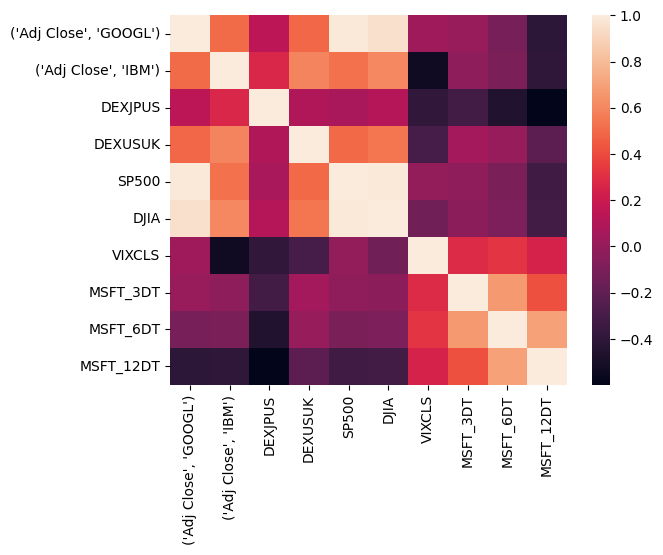

In [ ]:
sns.heatmap(dataCorr)

In [ ]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.502443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.142627,0.266252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.492364,0.592318,0.088711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.983325,0.522864,0.065211,0.495873,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.954155,0.603744,0.110699,0.539900,0.983523,0.000000,0.000000,0.000000,0.000000,0.0
6,0.036919,-0.530827,-0.391689,-0.302625,-0.008897,-0.139544,0.000000,0.000000,0.000000,0.0
7,0.006979,-0.029842,-0.311959,0.050360,-0.023139,-0.039864,0.282019,0.000000,0.000000,0.0
8,-0.115311,-0.093508,-0.461014,0.003517,-0.095613,-0.087408,0.323937,0.664654,0.000000,0.0
9,-0.407257,-0.402181,-0.598939,-0.211762,-0.325086,-0.314125,0.249163,0.413745,0.696985,0.0


In [ ]:
to_drop = [column for column in lower if any(lower[column] > 0.9)]
X.drop(to_drop, inplace=True, axis=1)


,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-10,-0.336166,0.004572,0.199625,-1.421087,-1.220836,0.115479,0.092646,-0.257390
2017-10-11,-0.397320,0.028951,0.191501,-1.410762,-1.247359,0.073350,0.040695,-0.261315
2017-10-12,-0.438323,0.032608,0.133005,-1.418560,-1.240440,0.151462,0.023365,-0.242517
2017-10-13,-0.433458,-0.021025,0.344241,-1.411048,-1.275035,0.106727,0.098442,-0.277607
2017-10-16,-0.452222,-0.047842,0.313368,-1.390198,-1.240440,0.068872,0.144382,-0.262982
...,...,...,...,...,...,...,...,...
2022-01-12,1.219417,0.320276,0.984450,1.871243,-0.351346,-1.355324,-2.824690,-3.192683
2022-01-13,1.323425,0.237389,1.026697,1.828021,-0.041144,-0.670413,-2.326814,-2.602798
2022-01-14,1.274534,0.216667,0.938953,1.778657,-0.170299,-0.697919,-2.426396,-2.525665
2022-01-18,1.161635,0.303211,0.805711,1.645752,0.244842,-0.531116,-1.988198,-2.308280


In [ ]:
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=seed)

### Create Model List

In [ ]:
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [ ]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)
params_LR

{'fit_intercept': [True, False], 'normalize': [True, False]}

In [ ]:
kernel = ['linear', 'rbf', 'poly']
C_list = [10, 100]
ep_list = [0.1, 1, 5]
gamma = [0.01, 0.1]
degree = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

In [ ]:
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR

    grid = GridSearchCV( estimator=model, n_jobs = 1,
                        verbose = 10,
                        cv = 4,
                        scoring = 'neg_mean_squared_error',
                        param_grid = params )
    grid_result = grid.fit(X_train, Y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/4; 1/4] END fit_intercept=True, normalize=True;, score=-225.602 total time=   0.0s
[CV 2/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/4; 1/4] END fit_intercept=True, normalize=True;, score=-236.325 total time=   0.0s
[CV 3/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/4; 1/4] END fit_intercept=True, normalize=True;, score=-226.016 total time=   0.0s
[CV 4/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 4/4; 1/4] END fit_intercept=True, normalize=True;, score=-245.179 total time=   0.0s
[CV 1/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/4; 2/4] END fit_intercept=True, normalize=False;, score=-225.602 total time=   0.0s
[CV 2/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/4;

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Progra

[CV 4/4; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-256.511 total time=   0.0s
[CV 1/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 1/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-819.667 total time=   0.0s
[CV 2/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 2/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-762.366 total time=   0.0s
[CV 3/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 3/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-629.869 total time=   0.0s
[CV 4/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 4/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-658.077 total time=   0.0s
[CV 1/4; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 1/4; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.0

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-250.915 total time=   0.0s
[CV 2/4; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 2/4; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-262.233 total time=   0.0s
[CV 3/4; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 3/4; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-244.966 total time=   0.0s
[CV 4/4; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 4/4; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-256.511 total time=   0.0s
[CV 1/4; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........
[CV 1/4; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-156.238 total time=   0.0s
[CV 2/4; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........
[CV 2/4; 5/72] END C=10, degree=2, epsilon=0.1, gamma

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-771.121 total time=   0.0s
[CV 3/4; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 3/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-622.541 total time=   0.0s
[CV 4/4; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 4/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-656.372 total time=   0.0s
[CV 1/4; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 1/4; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-5938.732 total time=   0.0s
[CV 2/4; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 2/4; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-5417.806 total time=   0.0s
[CV 3/4; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 3/4; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=p

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-155.822 total time=   0.0s
[CV 2/4; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 2/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-155.197 total time=   0.0s
[CV 3/4; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 3/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-135.802 total time=   0.0s
[CV 4/4; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 4/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-130.143 total time=   0.0s
[CV 1/4; 12/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly.........
[CV 1/4; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-780.526 total time=   0.0s
[CV 2/4; 12/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly.........
[CV 2/4; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-251.658 total time=   0.0s
[CV 1/4; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/4; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-817.196 total time=   0.0s
[CV 2/4; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/4; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-784.789 total time=   0.0s
[CV 3/4; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 3/4; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-636.233 total time=   0.0s
[CV 4/4; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 4/4; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-663.510 total time=   0.0s
[CV 1/4; 15/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly........
[CV 1/4; 15/72] END C=10, degree=2, epsilon=5, gamma=0.01, ker

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-256.431 total time=   0.0s
[CV 3/4; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 3/4; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-236.334 total time=   0.0s
[CV 4/4; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 4/4; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-251.658 total time=   0.0s
[CV 1/4; 17/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 1/4; 17/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-166.170 total time=   0.0s
[CV 2/4; 17/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 2/4; 17/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-162.231 total time=   0.0s
[CV 3/4; 17/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 3/4; 17/72] END C=10, degree=2, epsilon=5, gamma=0.1, ker

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-250.915 total time=   0.0s
[CV 2/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 2/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-262.233 total time=   0.0s
[CV 3/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 3/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-244.966 total time=   0.0s
[CV 4/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 4/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-256.511 total time=   0.0s
[CV 1/4; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........
[CV 1/4; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-156.238 total time=   0.0s
[CV 2/4; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........
[CV 2/4; 23/72] END C=10, degree=3, epsilon=0.1,

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1010.572 total time=   0.0s
[CV 3/4; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 3/4; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1026.811 total time=   0.0s
[CV 4/4; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 4/4; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1301.436 total time=   0.0s
[CV 1/4; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 1/4; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-249.560 total time=   0.0s
[CV 2/4; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 2/4; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-259.574 total time=   0.0s
[CV 3/4; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 3/4; 25/72] END C=10, degree=3, epsilon=1, gam

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-656.372 total time=   0.0s
[CV 1/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 1/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-6354.072 total time=   0.0s
[CV 2/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 2/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5794.128 total time=   0.0s
[CV 3/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 3/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-6368.949 total time=   0.0s
[CV 4/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 4/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5891.028 total time=   0.0s
[CV 1/4; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 1/4; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1,

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-135.802 total time=   0.0s
[CV 4/4; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 4/4; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-130.143 total time=   0.0s
[CV 1/4; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 1/4; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-1036.007 total time=   0.0s
[CV 2/4; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 2/4; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-1013.954 total time=   0.0s
[CV 3/4; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 3/4; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-1029.449 total time=   0.0s
[CV 4/4; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 4/4; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-817.196 total time=   0.0s
[CV 2/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-784.789 total time=   0.0s
[CV 3/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 3/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-636.233 total time=   0.0s
[CV 4/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 4/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-663.510 total time=   0.0s
[CV 1/4; 33/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly........
[CV 1/4; 33/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-6290.607 total time=   0.0s
[CV 2/4; 33/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly........
[CV 2/4; 33/72] END C=10, degree=3, epsilon=5, gamma=0.01, kern

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-162.231 total time=   0.0s
[CV 3/4; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 3/4; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-139.838 total time=   0.0s
[CV 4/4; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 4/4; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-139.299 total time=   0.0s
[CV 1/4; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 1/4; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-1018.787 total time=   0.0s
[CV 2/4; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 2/4; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-1034.013 total time=   0.0s
[CV 3/4; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 3/4; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=p

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-247.281 total time=   0.0s
[CV 2/4; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 2/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-261.521 total time=   0.0s
[CV 3/4; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 3/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-245.719 total time=   0.0s
[CV 4/4; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-255.044 total time=   0.0s
[CV 1/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-195.535 total time=   0.0s
[CV 2/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-202.650 total time=   0.0s
[CV 3/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 3/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-173.373 total time=   0.0s
[CV 4/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 4/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-197.090 total time=   0.0s
[CV 1/4; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/4; 39/72] END C=100, degree=2, epsilon=0.

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-247.281 total time=   0.0s
[CV 2/4; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 2/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-261.521 total time=   0.0s
[CV 3/4; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 3/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-245.719 total time=   0.0s
[CV 4/4; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-255.044 total time=   0.0s
[CV 1/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-59.358 total time=   0.0s
[CV 2/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-59.538 total time=   0.0s
[CV 3/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 3/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-55.756 total time=   0.0s
[CV 4/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 4/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-63.351 total time=   0.0s
[CV 1/4; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/4; 42/72] END C=100, degree=2, epsilon=0.1, gamma=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y wa

[CV 4/4; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-613.675 total time=   0.0s
[CV 1/4; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/4; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-250.639 total time=   0.0s
[CV 2/4; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 2/4; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-258.938 total time=   0.0s
[CV 3/4; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-241.459 total time=   0.0s
[CV 4/4; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 4/4; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-256.831 total time=   0.0s
[CV 1/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/4; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-193.595 total time=   0.0s
[CV 2/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/4; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-202.195 total time=   0.0s
[CV 3/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 3/4; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-168.840 total time=   0.0s
[CV 4/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 4/4; 44/72] END C=100, degree=2, epsilon=1, gamma=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-258.938 total time=   0.0s
[CV 3/4; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 3/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-241.459 total time=   0.0s
[CV 4/4; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 4/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-256.831 total time=   0.0s
[CV 1/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-59.127 total time=   0.0s
[CV 2/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-58.639 total time=   0.0s
[CV 3/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 3/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-52.471 total time=   0.0s
[CV 4/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 4/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-62.521 total time=   0.0s
[CV 1/4; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/4; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-460.974 total time=   0.0s
[CV 2/4; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/4; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=po

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-238.168 total time=   0.0s
[CV 2/4; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 2/4; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-255.389 total time=   0.0s
[CV 3/4; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 3/4; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-234.820 total time=   0.0s
[CV 4/4; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 4/4; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-252.080 total time=   0.0s
[CV 1/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-190.723 total time=   0.0s
[CV 2/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 2/4; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-202.589 total time=   0.0s
[CV 3/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 3/4; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-164.189 total time=   0.0s
[CV 4/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 4/4; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-196.483 total time=   0.0s
[CV 1/4; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 1/4; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-3018.710 total time=   0.0s
[CV 2/4; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 2/4; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-255.389 total time=   0.0s
[CV 3/4; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 3/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-234.820 total time=   0.0s
[CV 4/4; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 4/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-252.080 total time=   0.0s
[CV 1/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-58.393 total time=   0.0s
[CV 2/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-58.346 total time=   0.0s
[CV 3/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 3/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1,

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-62.996 total time=   0.0s
[CV 1/4; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/4; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-438.114 total time=   0.0s
[CV 2/4; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 2/4; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-450.306 total time=   0.0s
[CV 3/4; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 3/4; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-392.899 total time=   0.0s
[CV 4/4; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 4/4; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-592.661 total time=   0.0s
[CV 1/4; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 1/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, 

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-261.521 total time=   0.0s
[CV 3/4; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 3/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-245.719 total time=   0.0s
[CV 4/4; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 4/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-255.044 total time=   0.0s
[CV 1/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-195.535 total time=   0.0s
[CV 2/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-202.650 total time=   0.0s
[CV 3/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 3/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-173.373 total time=   0.0s
[CV 4/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 4/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-197.090 total time=   0.0s
[CV 1/4; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/4; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5681.998 total time=   0.0s
[CV 2/4; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/4; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5202.699 total time=   0.0s
[CV 3/4; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 3/4; 57/72] END C=100, degree=3, epsilon=0

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-247.281 total time=   0.0s
[CV 2/4; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 2/4; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-261.521 total time=   0.0s
[CV 3/4; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 3/4; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-245.719 total time=   0.0s
[CV 4/4; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-255.044 total time=   0.0s
[CV 1/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-59.358 total time=   0.0s
[CV 2/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-59.538 total time=   0.0s
[CV 3/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 3/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-55.756 total time=   0.0s
[CV 4/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 4/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-63.351 total time=   0.0s
[CV 1/4; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/4; 60/72] END C=100, degree=3, epsilon=0.1, gamma=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-469.080 total time=   0.0s
[CV 3/4; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 3/4; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-455.873 total time=   0.0s
[CV 4/4; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 4/4; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-501.192 total time=   0.0s
[CV 1/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-250.639 total time=   0.0s
[CV 2/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-258.938 total time=   0.0s
[CV 3/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 3/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-241.459 total time=   0.0s
[CV 4/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 4/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-256.831 total time=   0.0s
[CV 1/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-193.595 total time=   0.0s
[CV 2/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-202.195 total time=   0.0s
[CV 3/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-168.840 total time=   0.0s
[CV 4/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 4/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-196.186 total time=   0.0s
[CV 1/4; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/4; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5687.029 total time=   0.0s
[CV 2/4; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/4; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5183.885 total time=   0.0s
[CV 3/4; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 3/4; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5712.411 total time=   0.0s
[CV 4/4; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 4/4; 63/72] END C=100, degree=3, epsilon=1, gamma=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-258.938 total time=   0.0s
[CV 3/4; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 3/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-241.459 total time=   0.0s
[CV 4/4; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 4/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-256.831 total time=   0.0s
[CV 1/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-59.127 total time=   0.0s
[CV 2/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-58.639 total time=   0.0s
[CV 3/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 3/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-52.471 total time=   0.0s
[CV 4/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 4/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-62.521 total time=   0.0s
[CV 1/4; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/4; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-430.033 total time=   0.0s
[CV 2/4; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/4; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-467.282 total time=   0.0s
[CV 3/4; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 3/4; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-512.529 total time=   0.0s
[CV 1/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-238.168 total time=   0.0s
[CV 2/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 2/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-255.389 total time=   0.0s
[CV 3/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 3/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-234.820 total time=   0.0s
[CV 4/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-252.080 total time=   0.0s
[CV 1/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 1/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-190.723 total time=   0.0s
[CV 2/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 2/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-202.589 total time=   0.0s
[CV 3/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 3/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-164.189 total time=   0.0s
[CV 4/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 4/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-196.483 total time=   0.0s
[CV 1/4; 69/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly.......
[CV 1/4; 69/72] END C=100, degree=3, epsilon=5, gamma=0.0

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-238.168 total time=   0.0s
[CV 2/4; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 2/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-255.389 total time=   0.0s
[CV 3/4; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 3/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-234.820 total time=   0.0s
[CV 4/4; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 4/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-252.080 total time=   0.0s
[CV 1/4; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/4; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-58.393 total time=   0.0s
[CV 2/4; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/4; 71/72] END C=100, degree=3, epsilon=5, gamma=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

In [ ]:
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'C': 100, 'degree': 2, 'epsilon': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  -56.739069940330076


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
data_lr = []
data_rbf = []
data_poly = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    if param['kernel'] == 'linear':
        data_lr.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'rbf':
        data_rbf.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'poly':
        data_poly.append({'means': mean, 'stds': stdev})

-253.655953 (6.417673) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
-717.494923 (76.911445) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-5741.055229 (251.489721) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
-253.655953 (6.417673) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
-143.625017 (11.711560) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-885.866665 (119.131240) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-251.743291 (7.165090) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
-716.281851 (79.289592) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-5731.260555 (233.152444) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly'}
-251.743291 (7.165090) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.1, 'kerne

<AxesSubplot:>

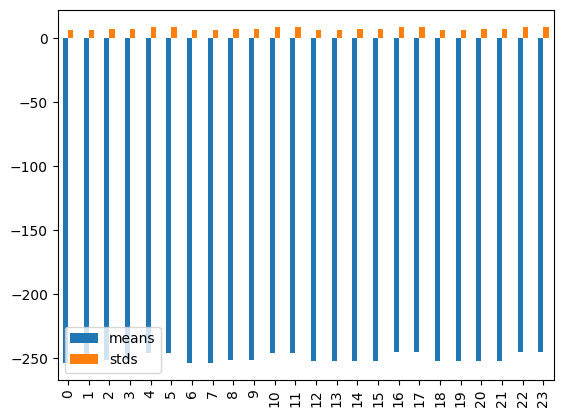

In [ ]:
df_linear = pd.DataFrame(data=data_lr)
df_linear.plot.bar()

<AxesSubplot:>

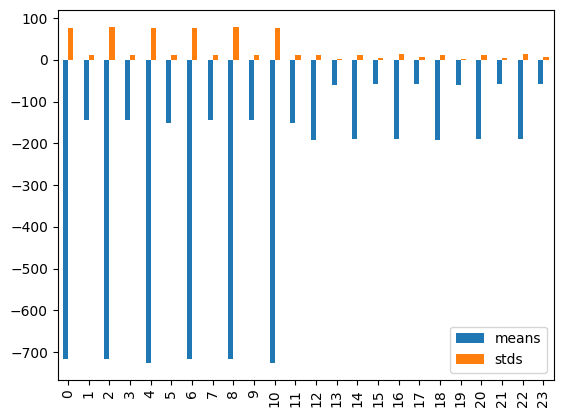

In [ ]:
df_rbf = pd.DataFrame(data=data_rbf)
df_rbf.plot.bar()

<AxesSubplot:>

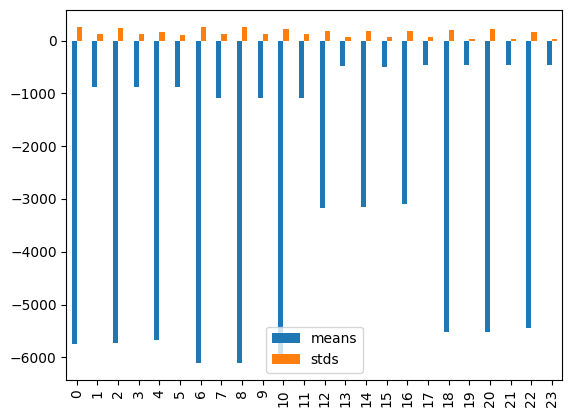

In [ ]:
df_poly = pd.DataFrame(data=data_poly)
df_poly.plot.bar()

In [ ]:
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [ ]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)

In [ ]:
kernel = ['linear', 'rbf', 'poly']
C_list = list(np.linspace(0.1, 150, 5, dtype = float))
ep_list = list(np.linspace(0.1, 1, 5, dtype = float))
gamma = list(np.linspace(0.01, 0.1, 5, dtype = float))
degree = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

In [ ]:
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)
SVR_Linear = svr_lin.fit(X_train,Y_train).predict(X_test)
SVR_Rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
SVR_Poly = svr_poly.fit(X_train,Y_train).predict(X_test)


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

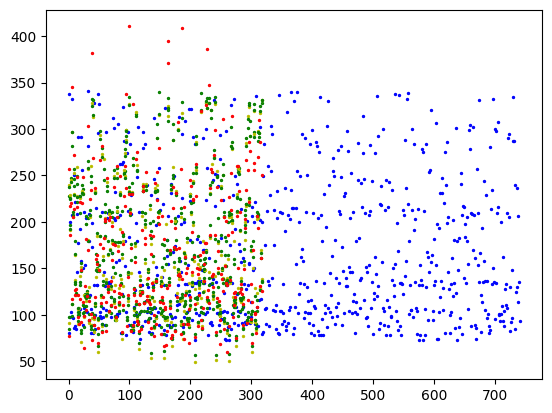

In [ ]:
plt.scatter(np.arange(len(Y_train)),Y_train, edgecolors='b', s=2)
plt.scatter(np.arange(len(Y_test)),Y_test, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Linear)),SVR_Linear, edgecolors='y', s=2)
plt.scatter(np.arange(len(SVR_Rbf)),SVR_Rbf, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Poly)),SVR_Poly, edgecolors='r', s=2)
plt.show()

In [ ]:
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR
    grid_rand = RandomizedSearchCV( estimator=model, n_jobs = 1, 
                                    verbose = 10,
                                    cv = 4,
                                    scoring = 'neg_mean_squared_error',
                                    param_distributions = params )
    grid_rand_result = grid_rand.fit(X_train, Y_train)

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Pytho

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/4; 1/4] END fit_intercept=True, normalize=True;, score=-225.602 total time=   0.0s
[CV 2/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/4; 1/4] END fit_intercept=True, normalize=True;, score=-236.325 total time=   0.0s
[CV 3/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/4; 1/4] END fit_intercept=True, normalize=True;, score=-226.016 total time=   0.0s
[CV 4/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 4/4; 1/4] END fit_intercept=True, normalize=True;, score=-245.179 total time=   0.0s
[CV 1/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/4; 2/4] END fit_intercept=True, normalize=False;, score=-225.602 total time=   0.0s
[CV 2/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/4;

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 1/10] END C=112.525, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=linear;, score=-259.091 total time=   0.0s
[CV 3/4; 1/10] START C=112.525, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=linear
[CV 3/4; 1/10] END C=112.525, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=linear;, score=-241.368 total time=   0.0s
[CV 4/4; 1/10] START C=112.525, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=linear
[CV 4/4; 1/10] END C=112.525, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=linear;, score=-257.376 total time=   0.0s
[CV 1/4; 2/10] START C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=linear


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 2/10] END C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-247.281 total time=   0.0s
[CV 2/4; 2/10] START C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=linear
[CV 2/4; 2/10] END C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-261.724 total time=   0.0s
[CV 3/4; 2/10] START C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=linear
[CV 3/4; 2/10] END C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-245.718 total time=   0.0s
[CV 4/4; 2/10] START C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=linear


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 2/10] END C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-255.044 total time=   0.0s
[CV 1/4; 3/10] START C=0.1, degree=3, epsilon=0.55, gamma=0.0325, kernel=poly...
[CV 1/4; 3/10] END C=0.1, degree=3, epsilon=0.55, gamma=0.0325, kernel=poly;, score=-6422.078 total time=   0.0s
[CV 2/4; 3/10] START C=0.1, degree=3, epsilon=0.55, gamma=0.0325, kernel=poly...
[CV 2/4; 3/10] END C=0.1, degree=3, epsilon=0.55, gamma=0.0325, kernel=poly;, score=-5856.607 total time=   0.0s
[CV 3/4; 3/10] START C=0.1, degree=3, epsilon=0.55, gamma=0.0325, kernel=poly...
[CV 3/4; 3/10] END C=0.1, degree=3, epsilon=0.55, gamma=0.0325, kernel=poly;, score=-6408.577 total time=   0.0s
[CV 4/4; 3/10] START C=0.1, degree=3, epsilon=0.55, gamma=0.0325, kernel=poly...
[CV 4/4; 3/10] END C=0.1, degree=3, epsilon=0.55, gamma=0.0325, kernel=poly;, score=-5932.566 total time=   0.0s
[CV 1/4; 4/10] START C=112.525, degree=2, epsilon=1.0, gamma=0.05500000000000001, kernel=linea

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 4/10] END C=112.525, degree=2, epsilon=1.0, gamma=0.05500000000000001, kernel=linear;, score=-258.979 total time=   0.0s
[CV 3/4; 4/10] START C=112.525, degree=2, epsilon=1.0, gamma=0.05500000000000001, kernel=linear
[CV 3/4; 4/10] END C=112.525, degree=2, epsilon=1.0, gamma=0.05500000000000001, kernel=linear;, score=-241.460 total time=   0.0s
[CV 4/4; 4/10] START C=112.525, degree=2, epsilon=1.0, gamma=0.05500000000000001, kernel=linear
[CV 4/4; 4/10] END C=112.525, degree=2, epsilon=1.0, gamma=0.05500000000000001, kernel=linear;, score=-256.835 total time=   0.0s
[CV 1/4; 5/10] START C=0.1, degree=3, epsilon=1.0, gamma=0.0775, kernel=poly....
[CV 1/4; 5/10] END C=0.1, degree=3, epsilon=1.0, gamma=0.0775, kernel=poly;, score=-6071.428 total time=   0.0s
[CV 2/4; 5/10] START C=0.1, degree=3, epsilon=1.0, gamma=0.0775, kernel=poly....
[CV 2/4; 5/10] END C=0.1, degree=3, epsilon=1.0, gamma=0.0775, kernel=poly;, score=-5533.520 total time=   0.0s
[CV 3/4; 5/10] START C=0.1, degr

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 5/10] END C=0.1, degree=3, epsilon=1.0, gamma=0.0775, kernel=poly;, score=-5715.027 total time=   0.0s
[CV 1/4; 6/10] START C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf......
[CV 1/4; 6/10] END C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-54.953 total time=   0.0s
[CV 2/4; 6/10] START C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf......
[CV 2/4; 6/10] END C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-55.165 total time=   0.0s
[CV 3/4; 6/10] START C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf......
[CV 3/4; 6/10] END C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-51.091 total time=   0.0s
[CV 4/4; 6/10] START C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf......
[CV 4/4; 6/10] END C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-57.898 total time=   0.0s
[CV 1/4; 7/10] START C=150.0, degree=2, epsilon=1.0, gamma=0.1, kernel=poly.....
[CV 1/4; 7/10] END C=150.0, degree=2, epsilon=1.0, 

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 7/10] END C=150.0, degree=2, epsilon=1.0, gamma=0.1, kernel=poly;, score=-450.736 total time=   0.0s
[CV 3/4; 7/10] START C=150.0, degree=2, epsilon=1.0, gamma=0.1, kernel=poly.....
[CV 3/4; 7/10] END C=150.0, degree=2, epsilon=1.0, gamma=0.1, kernel=poly;, score=-430.642 total time=   0.0s
[CV 4/4; 7/10] START C=150.0, degree=2, epsilon=1.0, gamma=0.1, kernel=poly.....
[CV 4/4; 7/10] END C=150.0, degree=2, epsilon=1.0, gamma=0.1, kernel=poly;, score=-593.455 total time=   0.0s
[CV 1/4; 8/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.05500000000000001, kernel=linear
[CV 1/4; 8/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.05500000000000001, kernel=linear;, score=-1922.644 total time=   0.0s
[CV 2/4; 8/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.05500000000000001, kernel=linear
[CV 2/4; 8/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.05500000000000001, kernel=linear;, score=-1839.249 total time=   0.0s
[CV 3/4; 8/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.055000

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

In [ ]:
print('Best params: ',grid_rand_result.best_params_)
print('Best score: ', grid_rand_result.best_score_)

Best params:  {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 0.1, 'degree': 2, 'C': 150.0}
Best score:  -54.776888579327235


In [ ]:
means = grid_rand_result.cv_results_['mean_test_score']
stds = grid_rand_result.cv_results_['std_test_score']
params = grid_rand_result.cv_results_['params']
data_linear = []
data_rbf = []
data_poly = []
all_data = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    all_data.append({'means': mean, 'stds': stdev})
    if param['kernel'] == 'linear':
        data_linear.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'rbf':
        data_rbf.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'poly':
        data_poly.append({'means': mean, 'stds': stdev})

-251.433852 (7.206588) with: {'kernel': 'linear', 'gamma': 0.05500000000000001, 'epsilon': 0.775, 'degree': 3, 'C': 112.525}
-252.442060 (6.418298) with: {'kernel': 'linear', 'gamma': 0.05500000000000001, 'epsilon': 0.1, 'degree': 3, 'C': 112.525}
-6154.956913 (261.795391) with: {'kernel': 'poly', 'gamma': 0.0325, 'epsilon': 0.55, 'degree': 3, 'C': 0.1}
-251.978505 (6.801183) with: {'kernel': 'linear', 'gamma': 0.05500000000000001, 'epsilon': 1.0, 'degree': 2, 'C': 112.525}
-5853.413820 (238.086983) with: {'kernel': 'poly', 'gamma': 0.0775, 'epsilon': 1.0, 'degree': 3, 'C': 0.1}
-54.776889 (2.424364) with: {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 0.1, 'degree': 2, 'C': 150.0}
-487.204584 (63.232202) with: {'kernel': 'poly', 'gamma': 0.1, 'epsilon': 1.0, 'degree': 2, 'C': 150.0}
-1718.915124 (171.525677) with: {'kernel': 'linear', 'gamma': 0.05500000000000001, 'epsilon': 0.55, 'degree': 2, 'C': 0.1}
-1717.410916 (172.826407) with: {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 0.775

<AxesSubplot:>

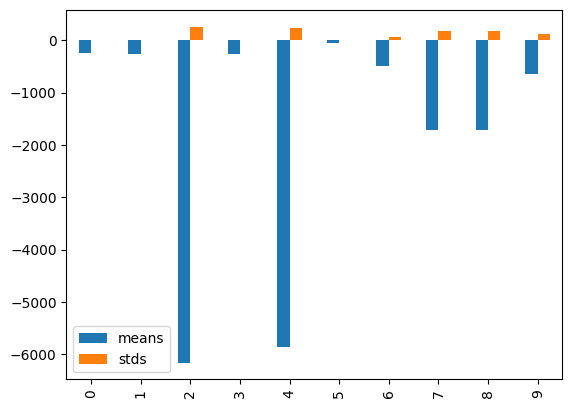

In [ ]:
df_all = pd.DataFrame(data=all_data)
df_all.plot.bar()

<AxesSubplot:>

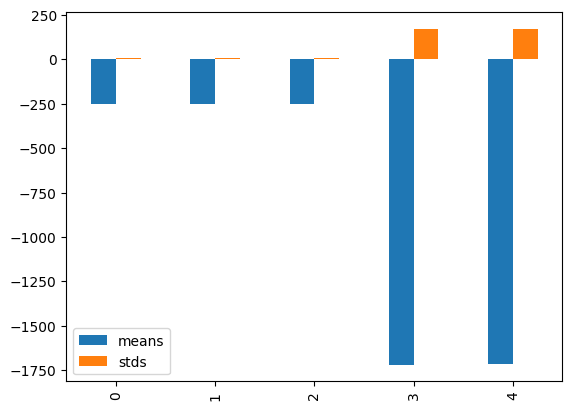

In [ ]:
df_linear = pd.DataFrame(data=data_linear)
df_linear.plot.bar()

<AxesSubplot:>

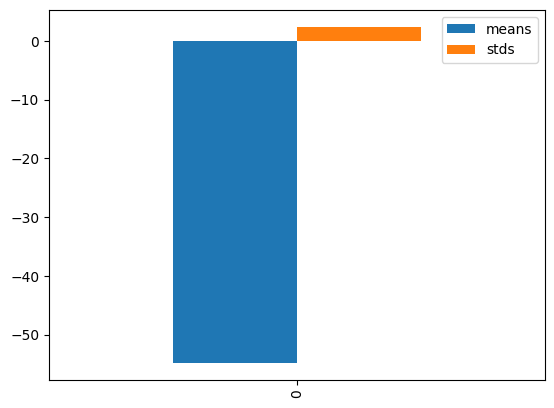

In [ ]:
df_rbf = pd.DataFrame(data=data_rbf)
df_rbf.plot.bar()

<AxesSubplot:>

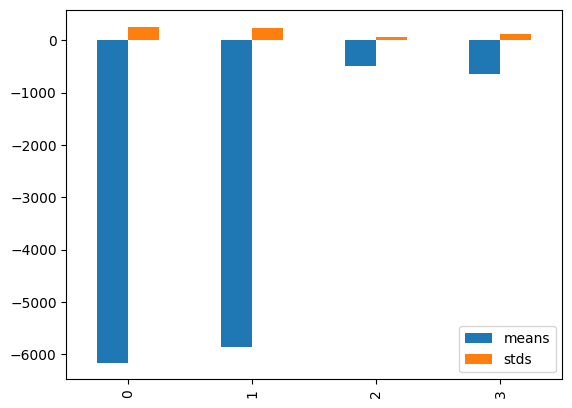

In [ ]:
df_poly = pd.DataFrame(data=data_poly)
df_poly.plot.bar()

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

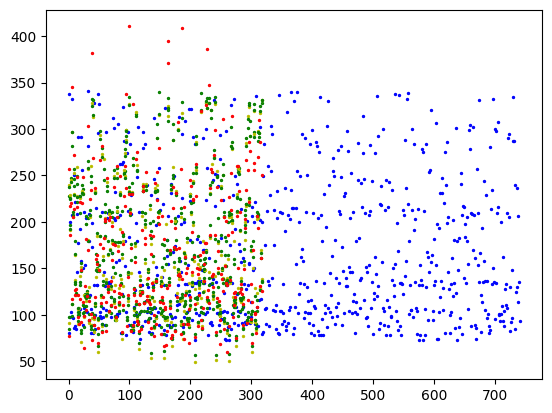

In [ ]:
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)
SVR_Linear = svr_lin.fit(X_train,Y_train).predict(X_test)
SVR_Rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
SVR_Poly = svr_poly.fit(X_train,Y_train).predict(X_test)
plt.scatter(np.arange(len(Y_train)),Y_train, edgecolors='b', s=2)
plt.scatter(np.arange(len(Y_test)),Y_test, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Linear)),SVR_Linear, edgecolors='y', s=2)
plt.scatter(np.arange(len(SVR_Rbf)),SVR_Rbf, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Poly)),SVR_Poly, edgecolors='r', s=2)
plt.show()